# この島のキノコは見たところ3種類あるようだ。
# そのうち2種類は毒キノコらしい。
# 3種類とも金色なので色では区別がつかない。」
# 食べても大丈夫なキノコを教えてほしい」

# データ読み込み

In [18]:
#○ と × だと扱いづらいので 1 と 0 にあらかじめ変換しておきます。
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 採ってきたキノコ
# キノコの傘の大きさと柄の長さが記されたデータ
data = np.genfromtxt('CodeIQ_data.txt', delimiter=' ')

# 隊員が食べたキノコ
# 0 毒キノコ
eaten = np.genfromtxt('CodeIQ_eaten.txt', delimiter=' ')
#print(eaten)

# データ可視化

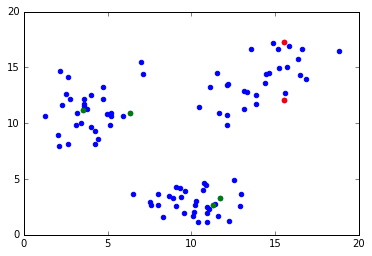

In [19]:
%matplotlib inline 
# 散布図にプロットのための関数
# キャンバスを描く
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 採ってきたキノコを青で描画する
x1, y1 = np.array([[x[0], x[1]] for x in data]).T
ax.scatter(x1, y1, color='b')

# 食べても大丈夫なキノコを赤で描画する
x2, y2= np.array([[x[0], x[1]] for x in eaten if x[2] == 1]).T
ax.scatter(x2, y2, color='r')

# 食べてはいけないキノコを緑で描画する
x3, y3 = np.array([[x[0], x[1]] for x in eaten if x[2] == 0]).T
ax.scatter(x3, y3, color='g')
plt.show()

* 上の図で赤い点が属しているクラスタが食べられるキノコです
* K-Means クラスタリングは k 個のクラスタにデータをわけるアルゴリズムです。
* 今回は 3 つのクラスタに分けますから k=3 となります。

# 解法

* 線形分離問題なので LinearSVC を使います。

In [22]:
def kmeans(features):
    # k=3, ランダマイズを 10 回実施する
    kmeans_model = KMeans(n_clusters=3, random_state=10).fit(features)
    # ラベルを取り出す
    labels = kmeans_model.labels_
    return labels
# K-Means クラスタリングをする
labels = kmeans(data)

* あとは内容を調べて青に所属するクラスタを表示すれば OK です。

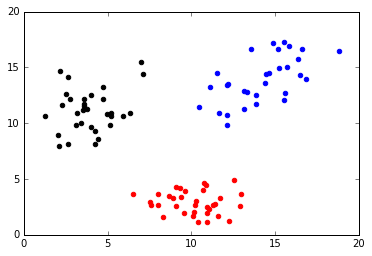

In [34]:
for label, feature in zip(labels, data):
    if label == 0:
        #print(label, feature)
        pass

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 結果から正解を抽出
x1,y1=np.array([[feature[0], feature[1]] for (label, feature) in zip(labels, data) if label == 0]).T
ax.scatter(x1, y1, color='b')

# 結果から不正解を抽出
x2, y2=np.array([[feature[0], feature[1]] for (label, feature) in zip(labels, data) if label == 1]).T
ax.scatter(x2, y2, color='r')

# 結果から不正解を抽出
x3, y3=np.array([[feature[0], feature[1]] for (label, feature) in zip(labels, data) if label == 2]).T
ax.scatter(x3, y3, color='k')

plt.xlim(0,20)
plt.ylim(0,20)

plt.show()